In [1]:
#importing some libraries that we will use throughout this project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing the data and getting some basic information about the dataset

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
#Doing some data preparation and filling in the missing data

In [10]:
df.corr()['total_bedrooms']

C:\Users\LimboLEG\AppData\Local\Temp\ipykernel_21244\556850113.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['total_bedrooms']


longitude             0.069608
latitude             -0.066983
housing_median_age   -0.320451
total_rooms           0.930380
total_bedrooms        1.000000
population            0.877747
households            0.979728
median_income        -0.007723
median_house_value    0.049686
Name: total_bedrooms, dtype: float64

In [11]:
df = df.copy()
missing_bedrooms = df['total_bedrooms'].isnull()
df_with_bedrooms = df[~missing_bedrooms]
df_missing_bedrooms = df[missing_bedrooms]

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()
lm.fit(df_with_bedrooms[['total_rooms', 'households']], df_with_bedrooms['total_bedrooms'])

LinearRegression()

In [14]:
pred_br = lm.predict(df_missing_bedrooms[['total_rooms', 'households']])

In [15]:
df.loc[missing_bedrooms, 'total_bedrooms'] = pred_br

In [16]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [17]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [18]:
df.duplicated().sum()

0

In [19]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [21]:
df.corr()["median_house_value"].sort_values(ascending=False)

C:\Users\LimboLEG\AppData\Local\Temp\ipykernel_21244\4243188108.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.050872
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255522
Name: median_house_value, dtype: float64

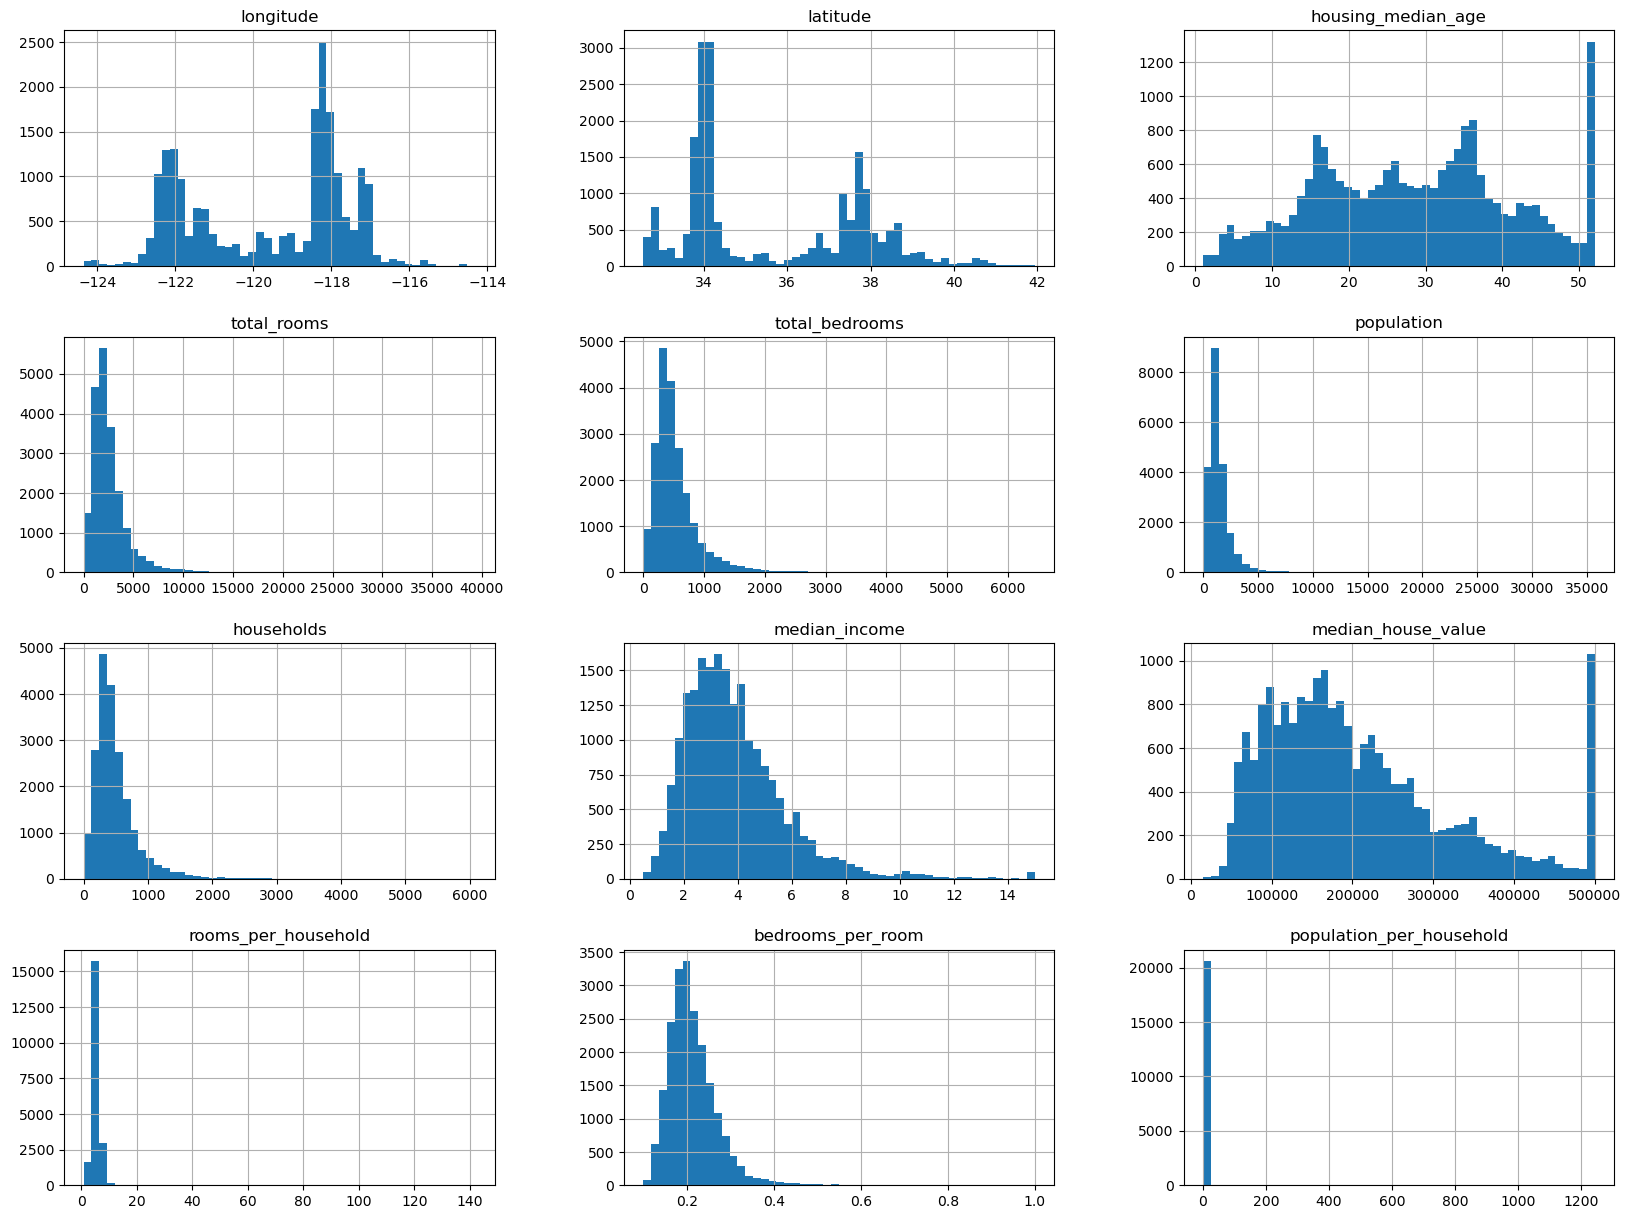

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\LimboLEG\AppData\Local\Temp\ipykernel_21244\3728401302.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

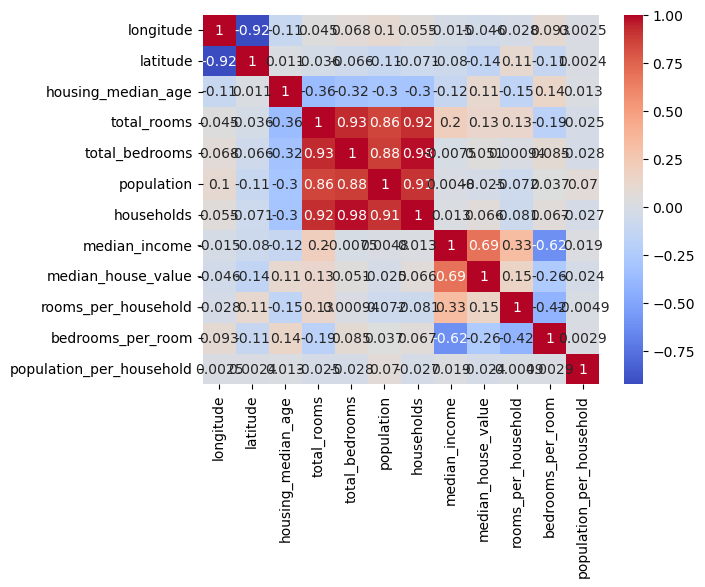

In [23]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='median_house_value', ylabel='median_income'>

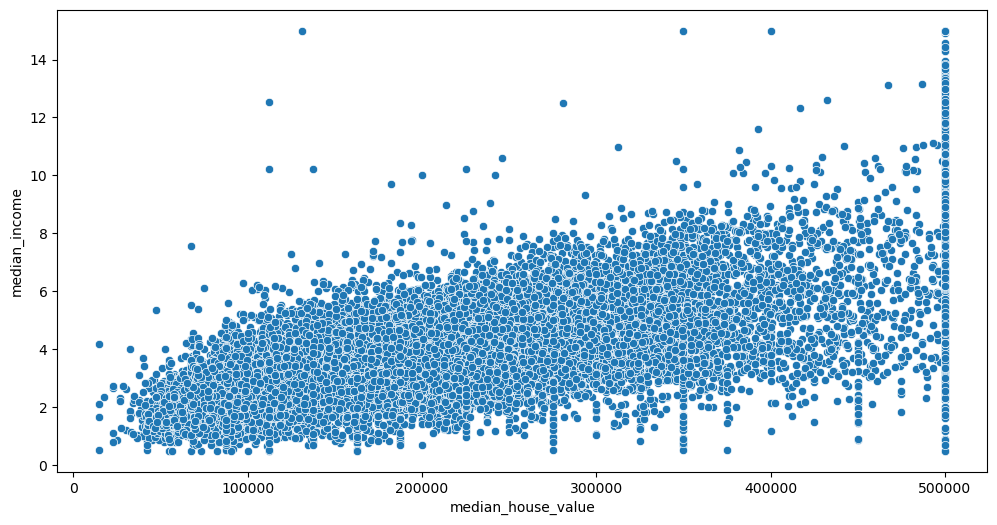

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='median_house_value', y='median_income', data=df)

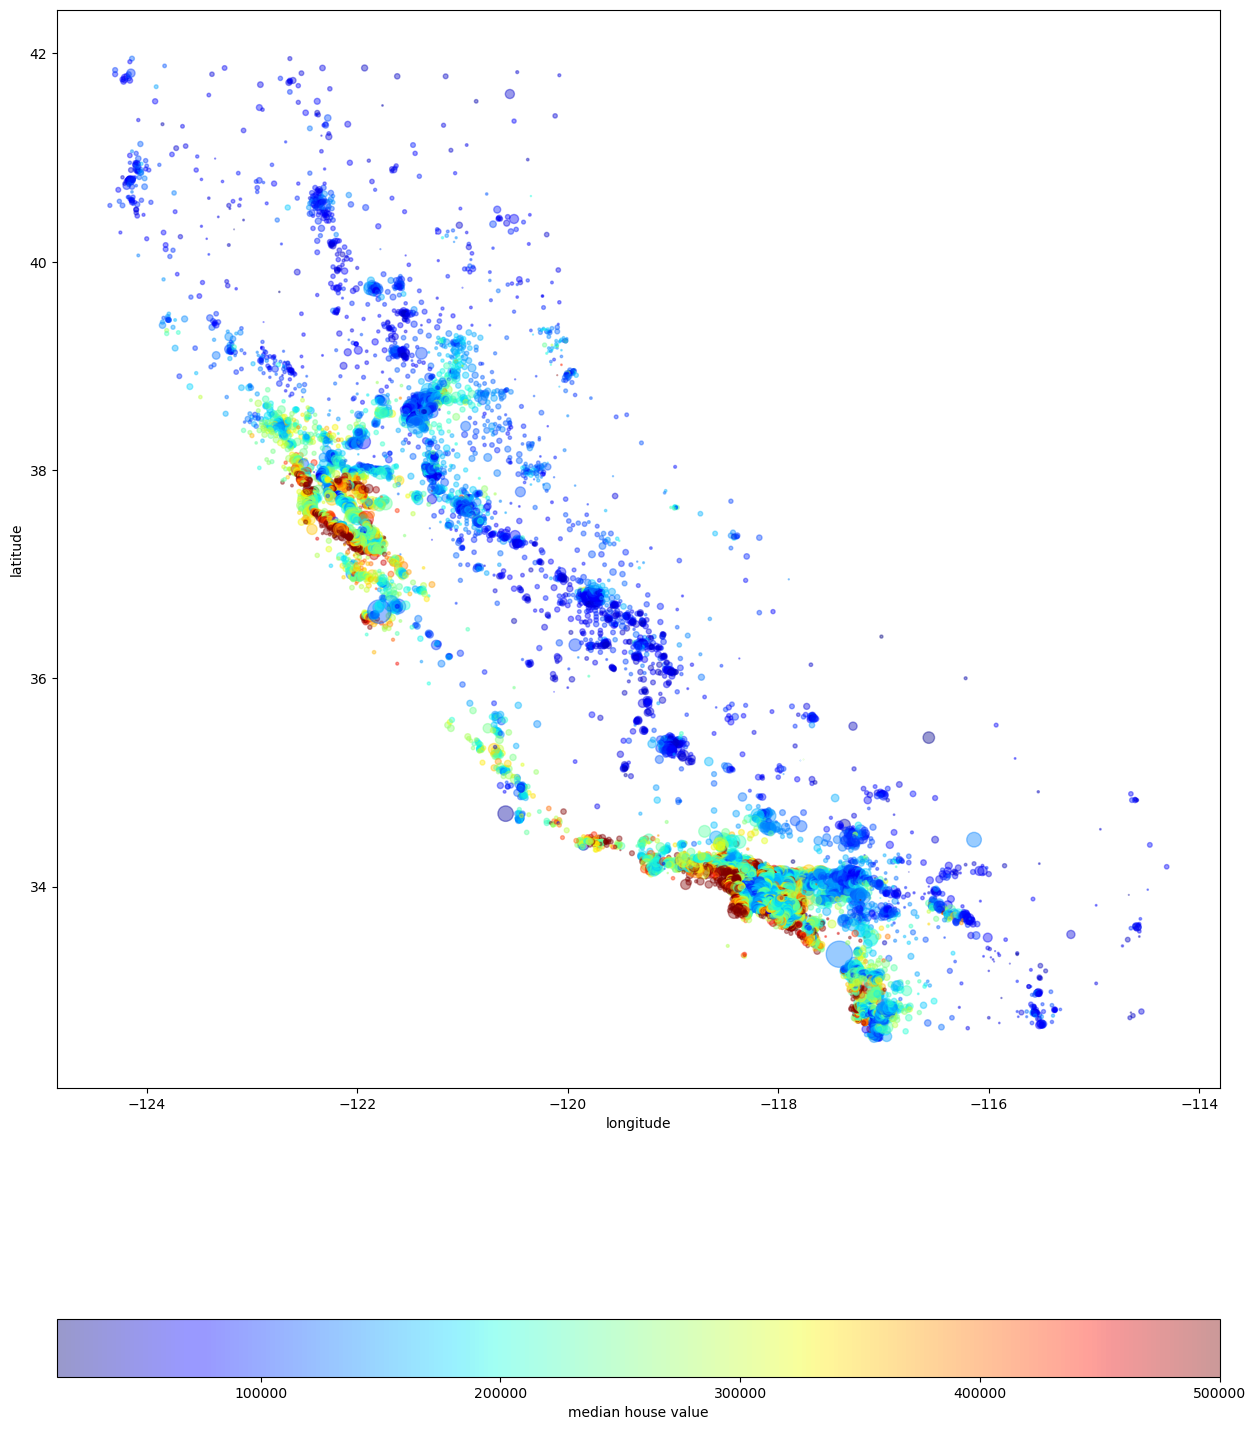

In [25]:
fig, ax = plt.subplots(figsize=(15,20))
cax = ax.scatter(df['longitude'], df['latitude'], alpha=0.4,
                 s=df['population']/100, 
                 c=df['median_house_value'], cmap='jet')
fig.colorbar(cax, label='median house value', orientation='horizontal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()


In [26]:
import folium

cm = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

for index, row in df.iterrows():
    if row['median_house_value'] > 450000:
        color = 'red'
    elif row['median_house_value'] > 300000:
        color = 'orange'
    elif row['median_house_value'] > 200000:
        color = 'green'
    else:
        color = 'blue'
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(cm)
    
cm.save('california_housing_map.html')
        

<Axes: xlabel='ocean_proximity', ylabel='count'>

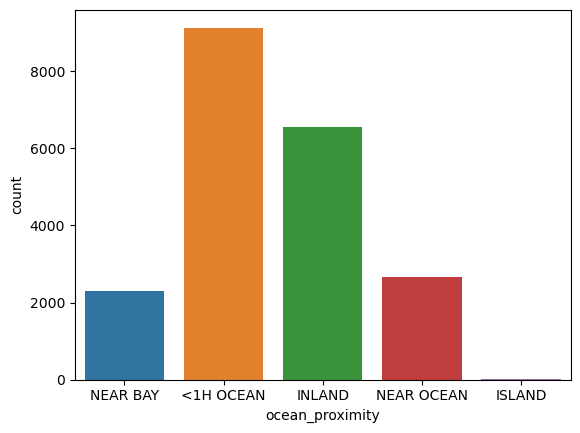

In [27]:
sns.countplot(data=df, x='ocean_proximity')



<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

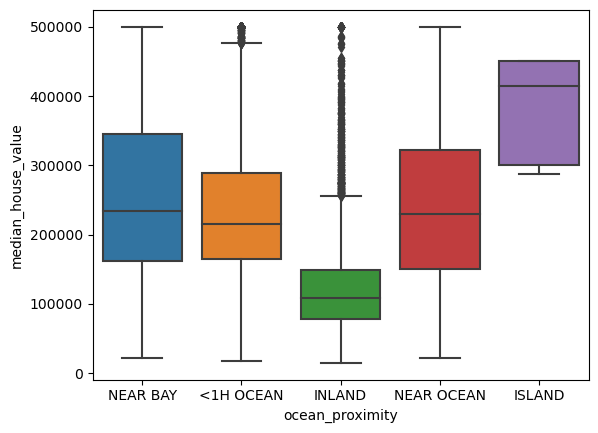

In [28]:
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')

In [29]:
# Now we move on to machine learning

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [34]:
numerical_cols = df.drop(['ocean_proximity', 'median_house_value'], axis=1).columns

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity'])
    ])

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

model_lr = Pipeline(steps = [('preprocessor', preprocessor),
                          ('regressor', LinearRegression())])
model_rf = Pipeline(steps = [('preprocessor', preprocessor),
                          ('regressor', RandomForestRegressor())])
model_svr = Pipeline(steps = [('preprocessor',preprocessor),
                            ('regressor', SVR())])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
models = {
    'Linear Regression': model_lr,
    'Random Forest': model_rf,
    'Support Vector Regression': model_svr
}
    


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    rmse_scores = np.sqrt(-scores)
    
    print(f'{model_name} Metrics:')
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Coefficient of Determination: {r2}')
    print(f'Cross-Validation RMSE: {rmse_scores.mean()} ({rmse_scores.std()})')
    print('\n')

Linear Regression Metrics:
Mean Squared Error: 4604981929.087269
Mean Absolute Error: 49108.951475797476
Root Mean Squared Error: 67860.01716097092
Coefficient of Determination: 0.6491549552144946
Cross-Validation RMSE: 71214.49876016773 (12969.21087442609)


Random Forest Metrics:
Mean Squared Error: 2429763583.7441235
Mean Absolute Error: 32154.994341085272
Root Mean Squared Error: 49292.632144612886
Coefficient of Determination: 0.8148808124582888
Cross-Validation RMSE: 63808.69284425156 (15282.59255304232)


Support Vector Regression Metrics:
Mean Squared Error: 13799556343.011063
Mean Absolute Error: 87625.3374755473
Root Mean Squared Error: 117471.5128999838
Coefficient of Determination: -0.05136264110018618
Cross-Validation RMSE: 117349.29961181486 (25310.963505084503)




In [ ]:
#Random Forest Regressor performed the best

In [ ]:
param_grid = [
    {'regressor__n_estimators': [3, 10], 'regressor__max_features': [2, 4]},
    {'regressor__bootstrap': [False], 'regressor__n_estimators': [3, 10], 'regressor__max_features': [2, 3]},
]

forest_reg = Pipeline(steps = [('preprocessor', preprocessor),
                          ('regressor', RandomForestRegressor(random_state=42))])

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)


In [101]:
print(grid_search.best_params_)

{'regressor__bootstrap': False, 'regressor__max_features': 3, 'regressor__n_estimators': 10}


In [ ]:
#let's start improving the code with cross-validation